In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('employee_attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# no missing values

df.isna().sum().unique()

# dropping useless columns : 'EmployeeCount','Over18'
df.drop(columns=['EmployeeCount','Over18','StandardHours'],inplace=True)



### Data Visualisation

In [4]:
categorical = ['WorkLifeBalance','EducationField','Department','JobRole','MaritalStatus','Gender','OverTime','Attrition','BusinessTravel', 'Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel']
numerical = [x for x in df.columns if x not in categorical]


## Class Imbalance (Target feature)
- There is obvious imbalance between the two classes, it may affect the model performance in the minority(Yes)

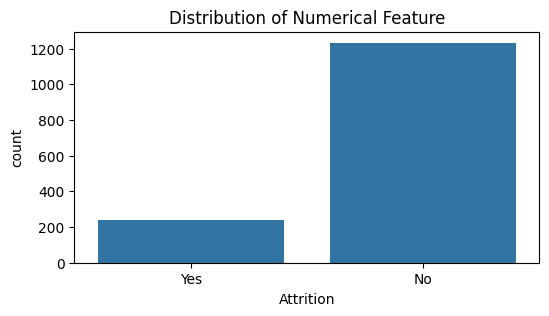

In [5]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'Attrition' , data = df)
plt.title('Distribution of Numerical Feature')
plt.show()



# Pearson Correlation between numerical features

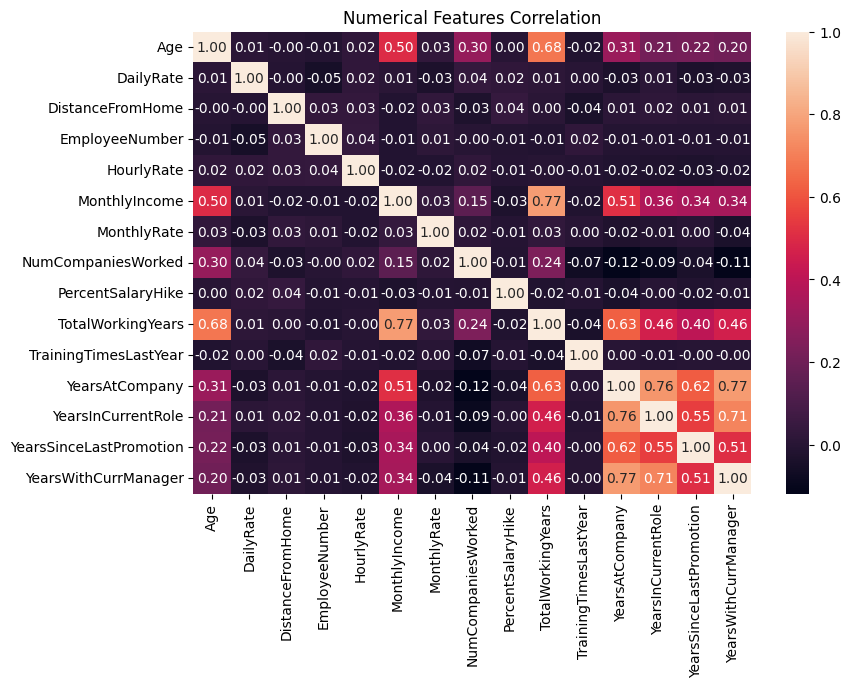

In [6]:


corr = df[numerical].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.title('Numerical Features Correlation')
plt.show()



# Spearman correlation between numerical features + ordinal categorical data

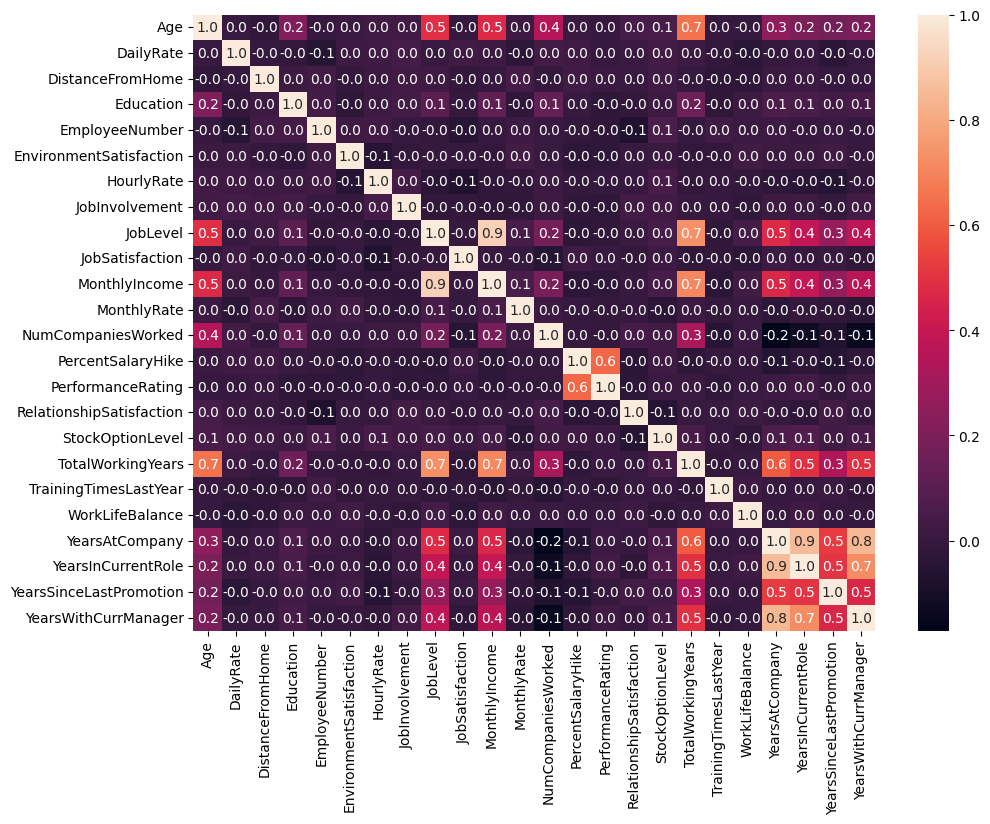

In [7]:


numerical_df = df.select_dtypes(exclude='object')

corr = numerical_df.corr(method='spearman')
plt.figure(figsize=(11,8))
sns.heatmap(data=corr,annot = True,fmt = '.1f')
plt.show()

### Create box plots for numerical features in relation to Attritin column

15


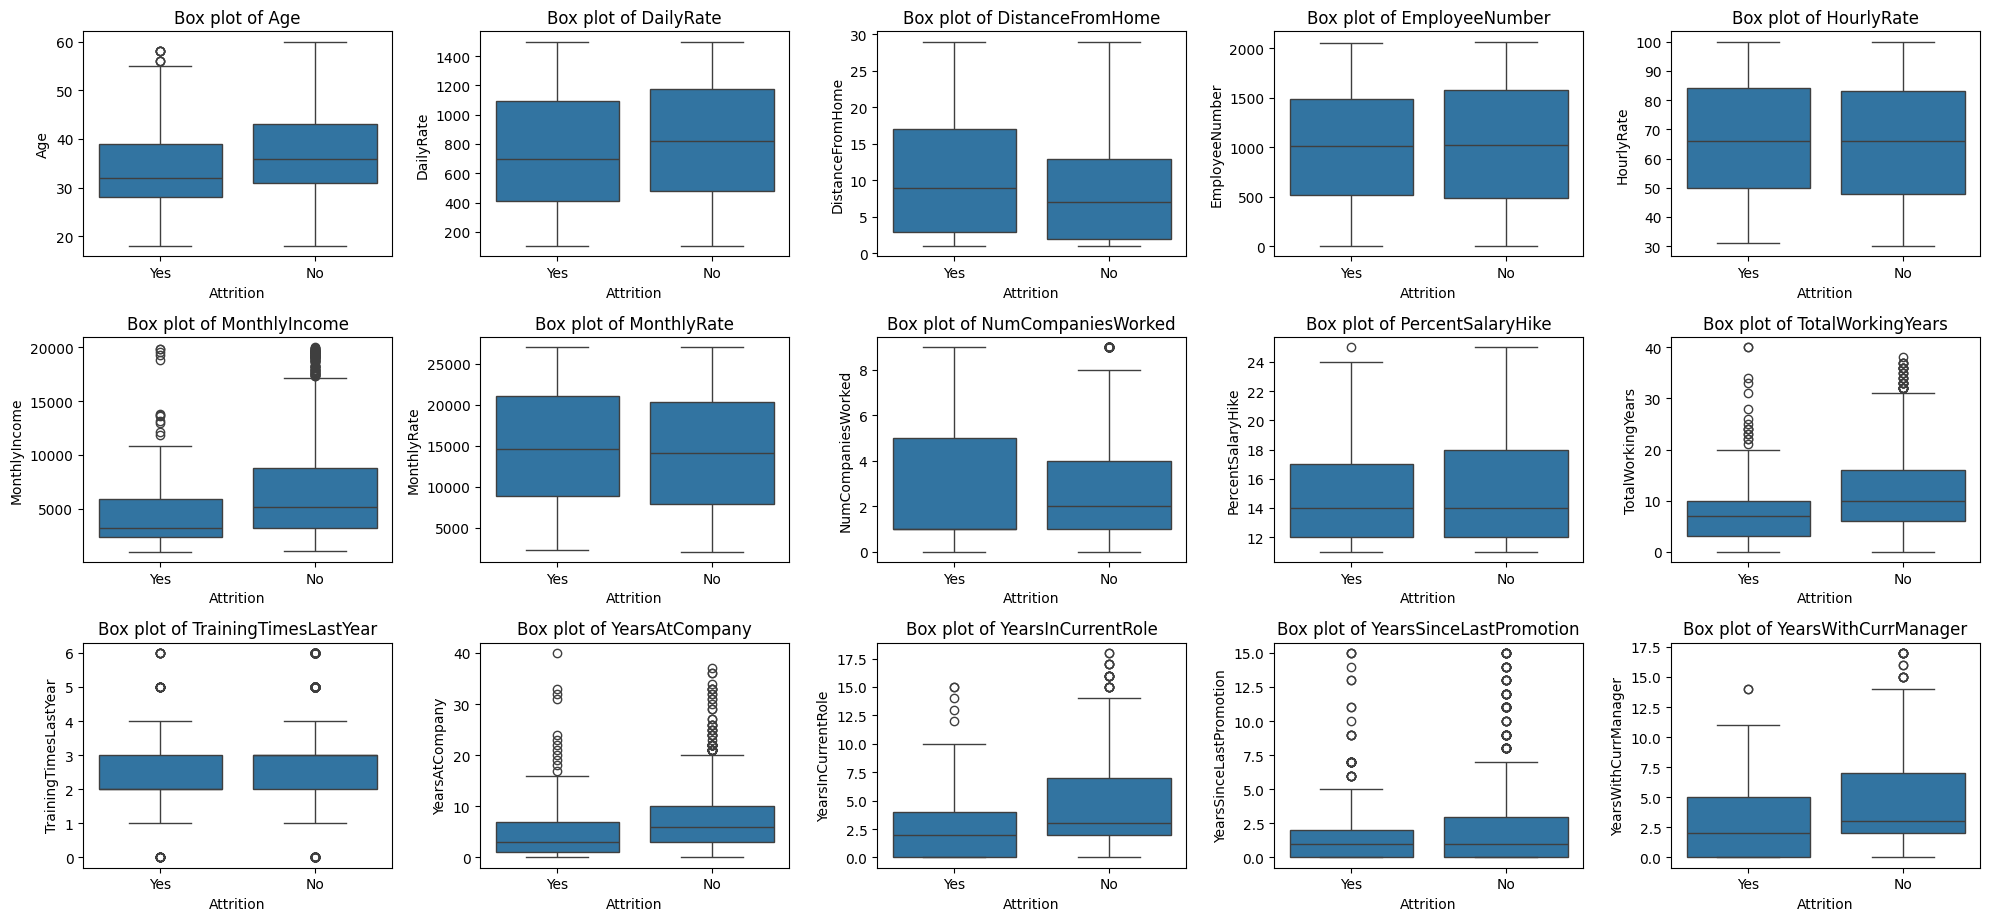

In [8]:
numerical_features = df[numerical]

print(numerical_features.columns.size)

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x='Attrition', y=feature, data=df)
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

### Bar Graph plot function and heatmap plot function

In [9]:
def plot_bar(list,target):
    table = pd.crosstab([*list],target)
    table.plot(kind='bar', figsize=(8, 5), colormap='viridis')
    plt.title(f'Bar Chart of {[x.name for x in list]} and Attrition')
    plt.xlabel(f'{[x.name for x in list]}')
    plt.ylabel('Count')
    plt.show()

    table['percentage'] = table['Yes']/ (table['No'] + table['Yes'] )
    print(table)

def plot_heatmap(list,target):
    table = pd.crosstab([*list], target)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(table, annot=True, fmt='d')
    plt.title(f'Heatmap of {[x.name for x in list]} and Attrition')
    plt.show()

    table['percentage'] = table['Yes']/ (table['No'] + table['Yes'] )
    print(table)



### Visualising various features in relation to attrition using bar graph and heatmap

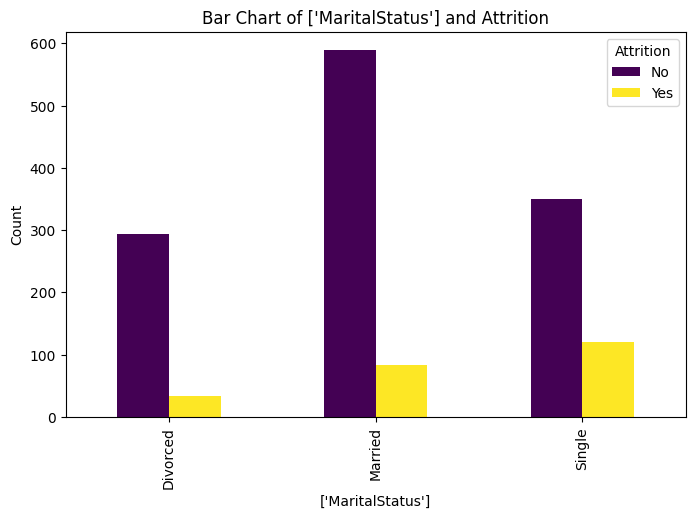

Attrition       No  Yes  percentage
MaritalStatus                      
Divorced       294   33    0.100917
Married        589   84    0.124814
Single         350  120    0.255319


In [10]:
plot_bar([df['MaritalStatus']],df['Attrition'])


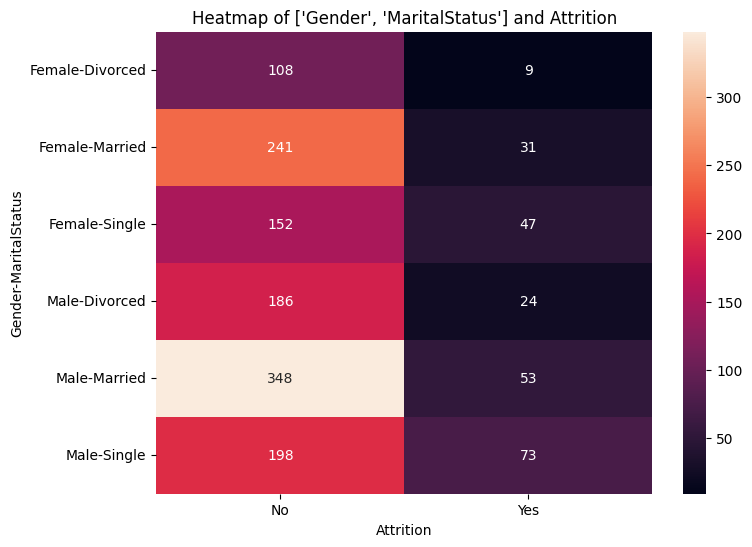

Attrition              No  Yes  percentage
Gender MaritalStatus                      
Female Divorced       108    9    0.076923
       Married        241   31    0.113971
       Single         152   47    0.236181
Male   Divorced       186   24    0.114286
       Married        348   53    0.132170
       Single         198   73    0.269373


In [11]:
plot_heatmap([df['Gender'],df['MaritalStatus']],df['Attrition'])

### Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- Why does Bachelor workers have the highest attrition rate

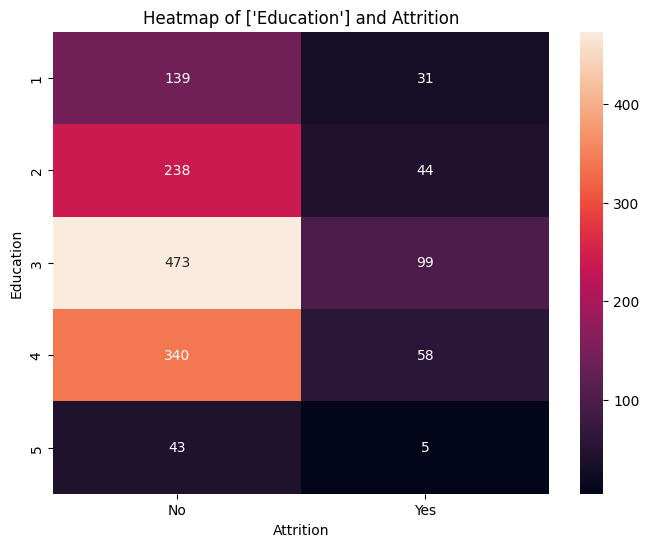

Attrition   No  Yes  percentage
Education                      
1          139   31    0.182353
2          238   44    0.156028
3          473   99    0.173077
4          340   58    0.145729
5           43    5    0.104167


In [12]:
plot_heatmap([df['Education']],df['Attrition'])


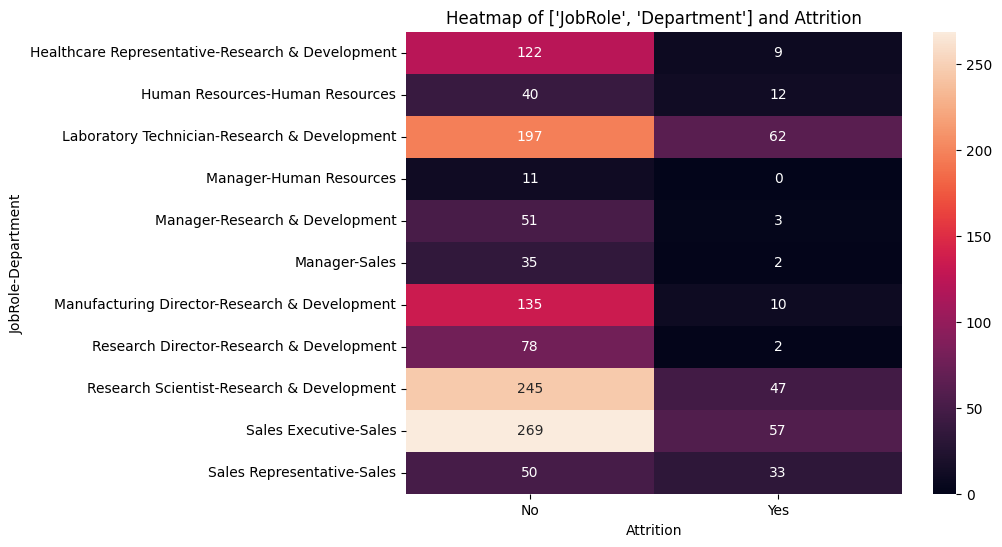

Attrition                                          No  Yes  percentage
JobRole                   Department                                  
Healthcare Representative Research & Development  122    9    0.068702
Human Resources           Human Resources          40   12    0.230769
Laboratory Technician     Research & Development  197   62    0.239382
Manager                   Human Resources          11    0    0.000000
                          Research & Development   51    3    0.055556
                          Sales                    35    2    0.054054
Manufacturing Director    Research & Development  135   10    0.068966
Research Director         Research & Development   78    2    0.025000
Research Scientist        Research & Development  245   47    0.160959
Sales Executive           Sales                   269   57    0.174847
Sales Representative      Sales                    50   33    0.397590


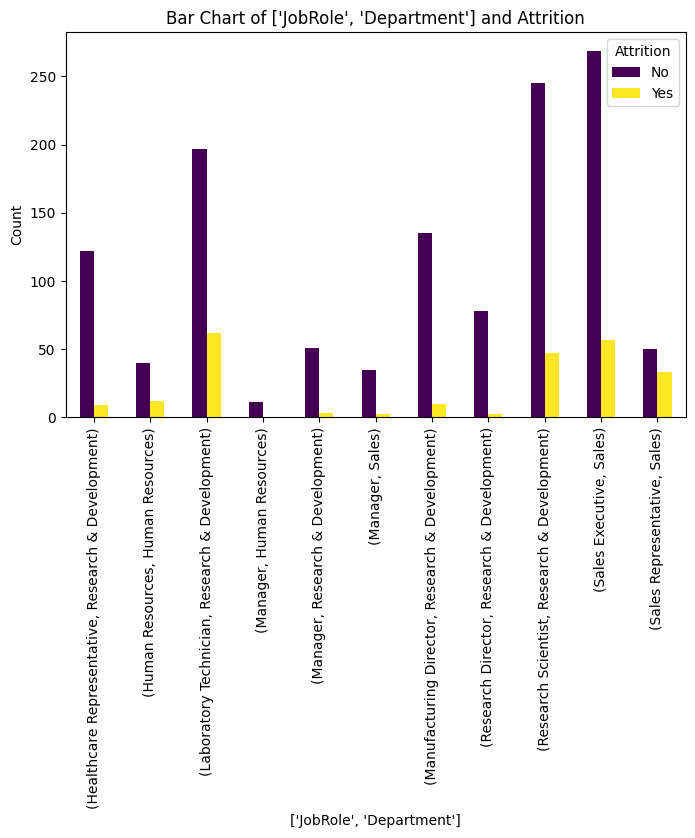

Attrition                                          No  Yes  percentage
JobRole                   Department                                  
Healthcare Representative Research & Development  122    9    0.068702
Human Resources           Human Resources          40   12    0.230769
Laboratory Technician     Research & Development  197   62    0.239382
Manager                   Human Resources          11    0    0.000000
                          Research & Development   51    3    0.055556
                          Sales                    35    2    0.054054
Manufacturing Director    Research & Development  135   10    0.068966
Research Director         Research & Development   78    2    0.025000
Research Scientist        Research & Development  245   47    0.160959
Sales Executive           Sales                   269   57    0.174847
Sales Representative      Sales                    50   33    0.397590


In [13]:
plot_heatmap([df['JobRole'],df['Department']],df['Attrition'])
plot_bar([df['JobRole'],df['Department']],df['Attrition'])

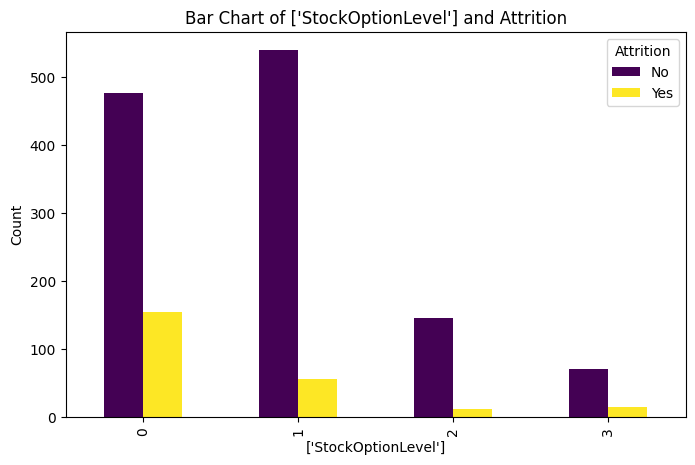

Attrition          No  Yes  percentage
StockOptionLevel                      
0                 477  154    0.244057
1                 540   56    0.093960
2                 146   12    0.075949
3                  70   15    0.176471


In [14]:
plot_bar([df['StockOptionLevel']],df['Attrition'])

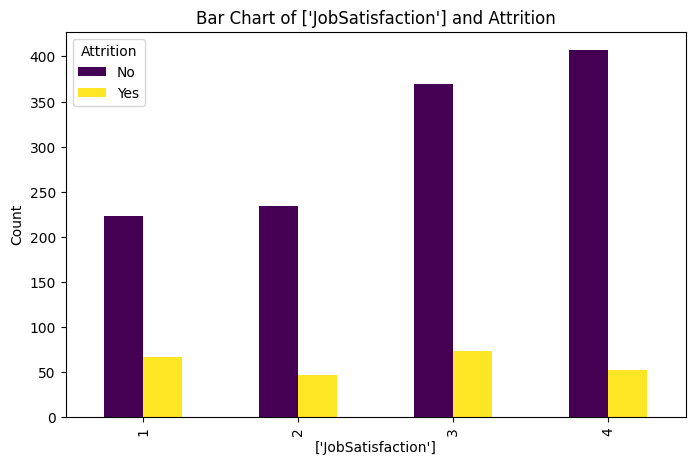

Attrition         No  Yes  percentage
JobSatisfaction                      
1                223   66    0.228374
2                234   46    0.164286
3                369   73    0.165158
4                407   52    0.113290


In [15]:
plot_bar([df['JobSatisfaction']],df['Attrition'])

### Chi2 - test for association between two categorical feature

In [16]:
import scipy.stats as stats

def chi2test(dataframe,feature1,feature2):
    # Create a contingency table
    contingency_table = pd.crosstab(dataframe[feature1], dataframe[feature2])

    # Perform chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f'Chi-square statistic: {chi2}')
    print(f'p-value: {p}')

    if p < 0.05:
        print("Statistically significant")

    return {'feature1':feature1,'feature2':feature2,'chi2' : chi2,'p-value' : p}

def t_test(dataframe,numerical,categorical):
    group1 = dataframe[dataframe[categorical] == 'Yes'][numerical]
    group2 = dataframe[dataframe[categorical] == 'No'][numerical]

    t_stats , p_val = stats.ttest_ind(group1,group2)

    print(f'T-test statistic: {t_stats}')
    print(f'p-value: {p_val}')

    if p_val < 0.05:
        print("Statistically significant")

    return {'feature1':numerical,'feature2':categorical,'ttest' : t_stats,'p-value':p_val}



### Testing relation of features with target variable
- categorical vs categorical
- numerical vs categorical

In [17]:
cat_scores = []
for cat in categorical:
    temp_dict = chi2test(df,cat,'Attrition')
    cat_scores.append(temp_dict)

Chi-square statistic: 16.3250970916474
p-value: 0.0009725698845348822
Statistically significant
Chi-square statistic: 16.024674119585427
p-value: 0.006773980139025213
Statistically significant
Chi-square statistic: 10.79600732241067
p-value: 0.004525606574479634
Statistically significant
Chi-square statistic: 86.19025367670434
p-value: 2.7524816380506567e-15
Statistically significant
Chi-square statistic: 46.163676540848705
p-value: 9.455511060340833e-11
Statistically significant
Chi-square statistic: 1.1169671241970975
p-value: 0.29057244902890855
Chi-square statistic: 87.56429365828768
p-value: 8.158423721538322e-21
Statistically significant
Chi-square statistic: 1462.6145539474094
p-value: 0.0
Statistically significant
Chi-square statistic: 24.182413685655174
p-value: 5.608614476449931e-06
Statistically significant
Chi-square statistic: 3.0739613982367193
p-value: 0.5455253376565949
Chi-square statistic: 22.503881435842295
p-value: 5.1234689062894205e-05
Statistically significant
Ch

In [18]:
num_scores = []
for x in numerical:
    temp_dict = t_test(df,x,'Attrition')
    num_scores.append(temp_dict)

T-test statistic: -6.178663835307217
p-value: 8.356308021103587e-10
Statistically significant
T-test statistic: -2.1740836777017747
p-value: 0.02985816066026497
Statistically significant
T-test statistic: 2.994708098265125
p-value: 0.0027930600802134266
Statistically significant
T-test statistic: -0.4052843139019291
p-value: 0.6853275897297122
T-test statistic: -0.26228987349264493
p-value: 0.7931347689944243
T-test statistic: -6.203935765608938
p-value: 7.14736398535381e-10
Statistically significant
T-test statistic: 0.5813058211545318
p-value: 0.5611235982243015
T-test statistic: 1.6680187953544354
p-value: 0.0955252620565195
T-test statistic: -0.5164573250747643
p-value: 0.6056128238893757
T-test statistic: -6.6522546135024445
p-value: 4.0618781112668525e-11
Statistically significant
T-test statistic: -2.28290299236669
p-value: 0.022578499737201205
Statistically significant
T-test statistic: -5.1963086670254235
p-value: 2.3188716103863033e-07
Statistically significant
T-test statist

In [19]:
# Statistically significant categorical features in relation to Attrition feature

significant_categorical = [(x['feature1'],x['feature2']) for x in cat_scores if x['p-value'] < 0.05]
significant_numerical = [(x['feature1'],x['feature2']) for x in num_scores if x['p-value'] < 0.05]


In [20]:
significant_categorical

[('WorkLifeBalance', 'Attrition'),
 ('EducationField', 'Attrition'),
 ('Department', 'Attrition'),
 ('JobRole', 'Attrition'),
 ('MaritalStatus', 'Attrition'),
 ('OverTime', 'Attrition'),
 ('Attrition', 'Attrition'),
 ('BusinessTravel', 'Attrition'),
 ('EnvironmentSatisfaction', 'Attrition'),
 ('JobInvolvement', 'Attrition'),
 ('JobLevel', 'Attrition'),
 ('JobSatisfaction', 'Attrition'),
 ('StockOptionLevel', 'Attrition')]

In [21]:
significant_numerical

[('Age', 'Attrition'),
 ('DailyRate', 'Attrition'),
 ('DistanceFromHome', 'Attrition'),
 ('MonthlyIncome', 'Attrition'),
 ('TotalWorkingYears', 'Attrition'),
 ('TrainingTimesLastYear', 'Attrition'),
 ('YearsAtCompany', 'Attrition'),
 ('YearsInCurrentRole', 'Attrition'),
 ('YearsWithCurrManager', 'Attrition')]

# Sales Department Analysis

In [22]:
sales_df = df[df['Department'] == 'Sales']
target = sales_df['Attrition']

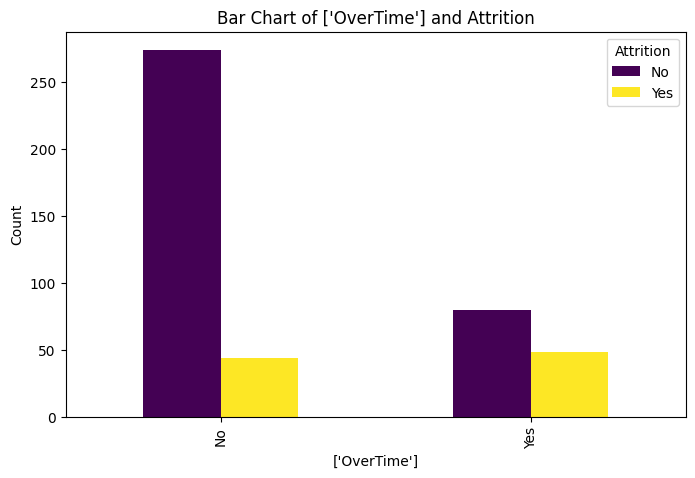

Attrition   No  Yes  percentage
OverTime                       
No         274   44    0.138365
Yes         80   48    0.375000


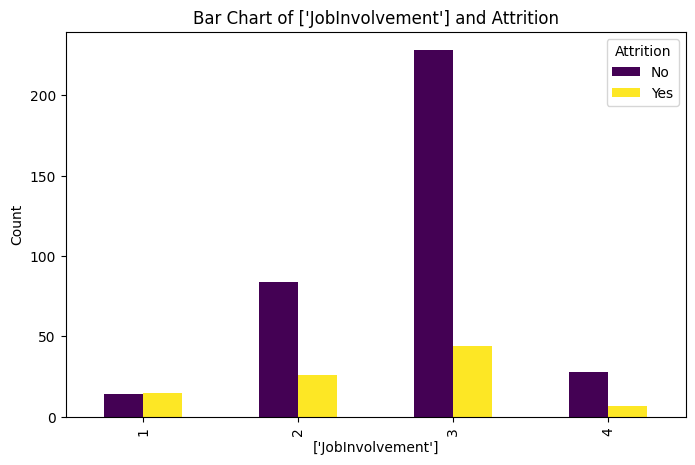

Attrition        No  Yes  percentage
JobInvolvement                      
1                14   15    0.517241
2                84   26    0.236364
3               228   44    0.161765
4                28    7    0.200000


In [23]:
# Overtime in Sales Department is a contributing factor to employee attrition

plot_bar([sales_df['OverTime']],target)
plot_bar([sales_df['JobInvolvement']],target)



In [24]:
chi2test(sales_df,'OverTime','Attrition')
chi2test(sales_df,'JobInvolvement','Attrition')
pass

Chi-square statistic: 29.784726517480497
p-value: 4.8278048365768374e-08
Statistically significant
Chi-square statistic: 21.035842293663286
p-value: 0.00010348713210757098
Statistically significant


In [25]:
t_test(sales_df,numerical = 'MonthlyIncome',categorical='Attrition')
pass

T-test statistic: -2.808597167390819
p-value: 0.0051952793051337435
Statistically significant


### Solve : why Sales Representative from Sales Department is facing a attrition crisis? What are the factors driving it?
- Low MonthlyIncome
- Low JobInvolvement
- OverTime
- MonthlyRate (Monthly rate is the internal charge out rate which will be used to calculate the cost of each employee monthly, in general, the monthly rate will cover salary, social insurance, administration, logistics, over head etc.
Monthly income is just how much the employee earned monthly.)


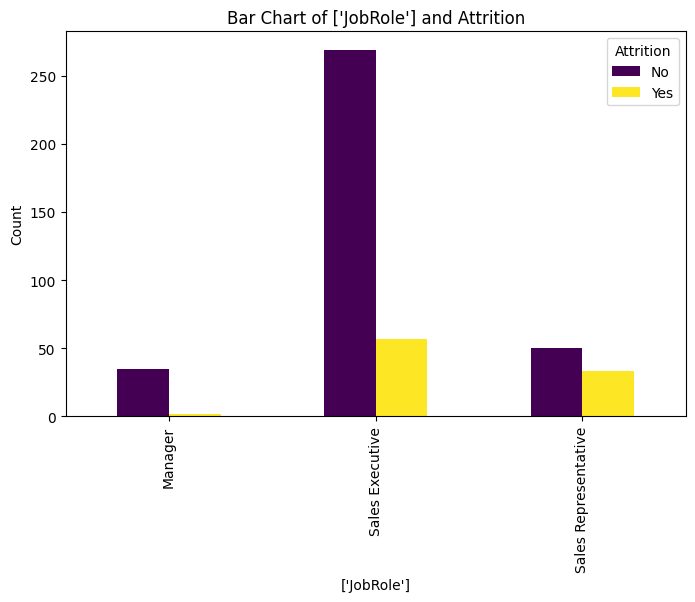

Attrition              No  Yes  percentage
JobRole                                   
Manager                35    2    0.054054
Sales Executive       269   57    0.174847
Sales Representative   50   33    0.397590


In [26]:
plot_bar([sales_df['JobRole']],target)

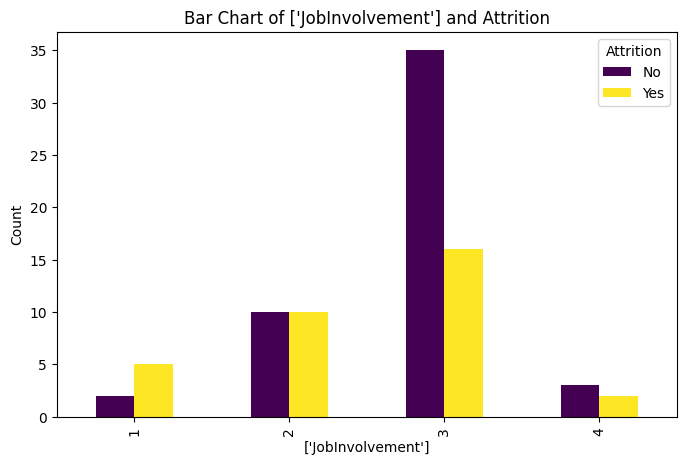

Attrition       No  Yes  percentage
JobInvolvement                     
1                2    5    0.714286
2               10   10    0.500000
3               35   16    0.313725
4                3    2    0.400000


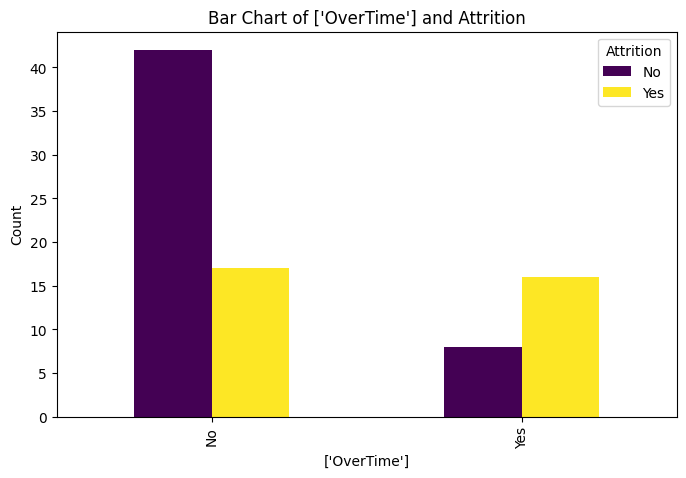

Attrition  No  Yes  percentage
OverTime                      
No         42   17    0.288136
Yes         8   16    0.666667


In [27]:
plot_bar([sales_df[sales_df['JobRole'] == 'Sales Representative']['JobInvolvement']],target)
plot_bar([sales_df[sales_df['JobRole'] == 'Sales Representative']['OverTime']],target)

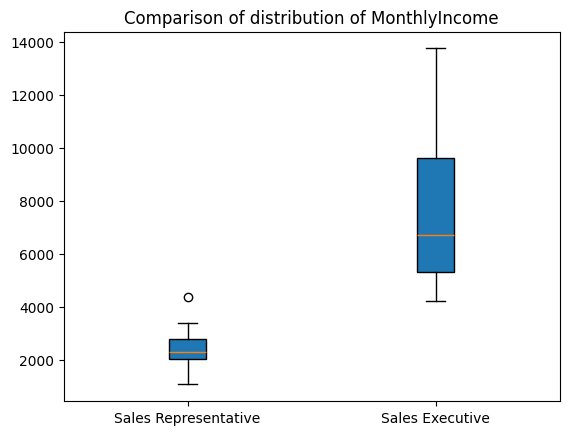

In [28]:
sales_rep = sales_df[(sales_df['JobRole'] == 'Sales Representative') & (sales_df['Attrition'] == 'Yes')]
exec = sales_df[(sales_df['JobRole'] == 'Sales Executive') & (sales_df['Attrition'] == 'Yes')]

fig, ax = plt.subplots()
ax.boxplot([sales_rep['MonthlyIncome'],exec['MonthlyIncome']],patch_artist=True)
ax.set_xticklabels(['Sales Representative','Sales Executive'])
plt.title('Comparison of distribution of MonthlyIncome')
plt.show()

### Insights gained from Survival Analysis(survival.ipynb notebook)
- Employee that travels frequently have higher attrition
- why does travel frequently a factor to higher attrition
  - relationship with family, away time for family etc
  - Frequent travel can significantly disrupt an employee's work-life balance. Time spent away from home, family, and friends can lead to personal strain and dissatisfaction.
  - Constant travel can be physically exhausting and mentally draining. Jet lag, irregular sleep patterns, and long hours in transit can contribute to fatigue and burnout.
  - Frequent travel can strain relationships with partners, children, and friends, leading to personal conflicts and stress.

According to KaplanMeierCurve of 'BusinessTravel' from survival.ipynb, employees that travel frequently have higher attrition rate compared to others who rarely travels or does not travel in work. Looking further into the 'why', we can see that among the employees that travel frequently, 42% of them are married. Frequent travelling at work may have taken a toll on their relationships with their families,leading to personal conflict and stress.

In [29]:
df[df['BusinessTravel'] == 'Travel_Frequently']['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Married     0.425993
Single      0.346570
Divorced    0.227437
Name: proportion, dtype: float64

### Insights gained from Survival Analysis (survival.ipynb notebook)
- employee with lower job level have higher attrition rate
- lower job level -> overtime 
- monthlyincome is low

According to the KaplanMeierCurve of 'JobLevel', employees with lower level job have a higher risk of turnover. Low job level is often accompanied by lower MonthlyIncome, this may be a contributing factor of higher attrition risk in lower job levels. Besides, lower job levels employee may be constantly seeking new job opportunities to improve themselves by having better job offer.

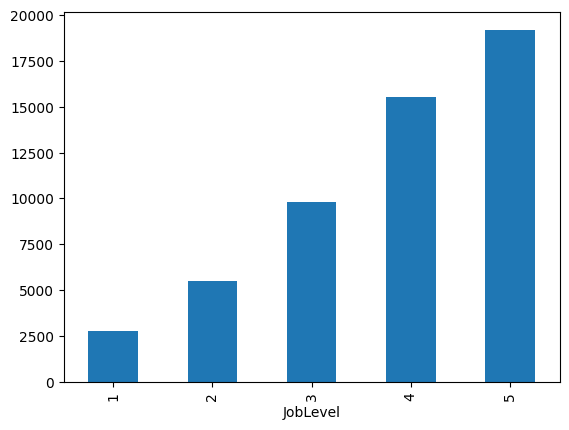

In [30]:
test = df.groupby(['JobLevel'])
test['MonthlyIncome'].mean().plot(kind='bar')
plt.show()


Employee with lower JobLevel works overtime more than the one with higher job level. Its obvious that employees with low income and having to work more may leave existing company for better job offers, and they are also more likely to be unsatisfied with their current work.

In [31]:
df[df['OverTime'] == 'Yes']['JobLevel'].value_counts(normalize=True)

JobLevel
1    0.375000
2    0.350962
3    0.151442
4    0.079327
5    0.043269
Name: proportion, dtype: float64